In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [3]:
data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
test_data = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

data_frame = pd.DataFrame(data)

standard_train_data = StandardScaler().fit_transform(data_frame)

pca = PCA(n_components= data_frame.shape[1])
principal_components = pca.fit_transform(standard_train_data)

In [4]:
variance = pca.explained_variance_ratio_
ratio = []
for i in range(len(variance)):
    summ = 0
    for j in range(i+1):
        summ = summ + variance[j]
    ratio.append(summ)

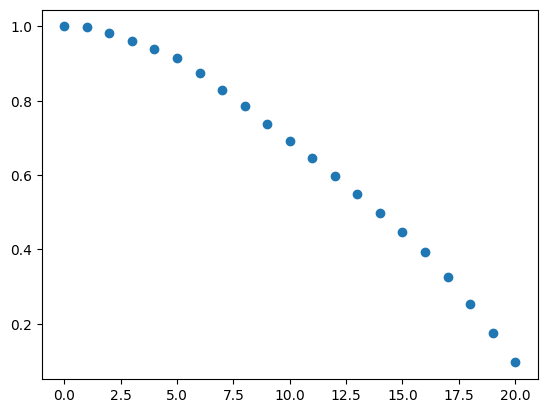

In [5]:
mp.scatter(range(len(variance)),sorted(ratio, reverse=True))

In [6]:
standard_train_data_frame = pd.DataFrame(standard_train_data)

x_train, x_test, y_train, y_test = train_test_split(standard_train_data_frame.iloc[:,:-1], data_frame.iloc[:,-1])

lr = LogisticRegression(max_iter = 10000, multi_class= "multinomial", solver= "saga", tol = 1e-15)
lr.fit(x_train, y_train)
predict_train_data = lr.predict(x_train)
predict_test_data = lr.predict(x_test)

In [7]:
print (classification_report (y_train, predict_train_data))
print ("Accuracy of training data is: ", accuracy_score (y_train, predict_train_data))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       381
           1       0.96      0.95      0.96       373
           2       0.97      0.97      0.97       372
           3       0.98      0.99      0.99       374

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

Accuracy of training data is:  0.972


In [8]:
print (classification_report (y_test, predict_test_data))
print ("Accuracy of test data is: ", accuracy_score (y_test,predict_test_data ))
print("\n\nThe confusion matrix is found as:\n", confusion_matrix(y_test,predict_test_data))
print("\n\nf1-score of the model is:\n",f1_score(y_test,predict_test_data, average= "macro"))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       119
           1       0.98      0.95      0.96       127
           2       0.98      0.93      0.96       128
           3       0.95      1.00      0.97       126

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

Accuracy of test data is:  0.968


The confusion matrix is found as:
 [[118   1   0   0]
 [  4 121   2   0]
 [  0   2 119   7]
 [  0   0   0 126]]


f1-score of the model is:
 0.9680482011184199
